Installing dependencies and setup


In [1]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\User\AppData\Local\Temp\pip-install-gsdq267g\tensorflow-gpu_7ee643856b7f4a1cb05609252990c775\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build

In [2]:
!pip list


Package                      Version
---------------------------- ------------
absl-py                      2.0.0
asttokens                    2.4.0
astunparse                   1.6.3
backcall                     0.2.0
beautifulsoup4               4.12.2
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
coloredlogs                  15.0.1
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
et-xmlfile                   1.1.0
executing                    1.2.0
flatbuffers                  23.5.26
fonttools                    4.43.1
gast                         0.5.4
google-auth                  2.23.4
google-auth-oauthlib         1.1.0
google-pasta                 0.2.0
grpcio                       1.59.3
h5py                         3.10

In [3]:
import tensorflow as tf 
import os

In [4]:
os.path.join('data','happy')

'data\\happy'

In [5]:
gpus=tf.config.experimental.list_physical_devices("CPU")

In [6]:
len(gpus)

1

In [7]:
#limiting the gpu use if you have any to avoid OOM
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

Data Cleaning


In [8]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\User\AppData\Local\Temp\ipykernel_10236\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [9]:
data_dir='data'

In [10]:
Image_exts=['jpeg','jpg','bmp','png']

In [11]:
os.listdir(data_dir)

['Happy', 'Sad']

In [12]:
os.listdir(os.path.join(data_dir,'happy'))#happy imaage directory

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '13ryLrJDyVF05wXDYYUXcJQ.jpeg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '1zgJ8mDXVYwNY_5KkZr9Wzw.jpeg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '2016-01-04-1451880335-5503640-thedailyhabitsofsupremelyhappypeople.jpg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '7-principles-of-successful-and-happy-people.png',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '81BduzygJPL._AC_UF10001000_QL80_.jpg',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '960x0.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'compassion-900x387.jpg',
 'es_27x40_pre_final_en-us_cps_custom-c5a0cc5b

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):#this allows us to get the path of the images class
        image_path=os.path.join(data_dir,image_class,image)#this allows us to get the path of each and every images 
        try:
            img=cv2.imread(image_path)#imread allows to open that imags
            tip=imghdr.what(image_path)
            if tip not in Image_exts:
                print("Image no tin ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with images {}".format(image_path))

In [14]:
happy_image_1=cv2.imread(os.path.join('data','happy','smile.woman_.jpg'))#helps to read our imagaes in numpy array 

In [15]:
happy_image_1.shape #gives the result in the form of row column and channel

(3844, 5125, 3)

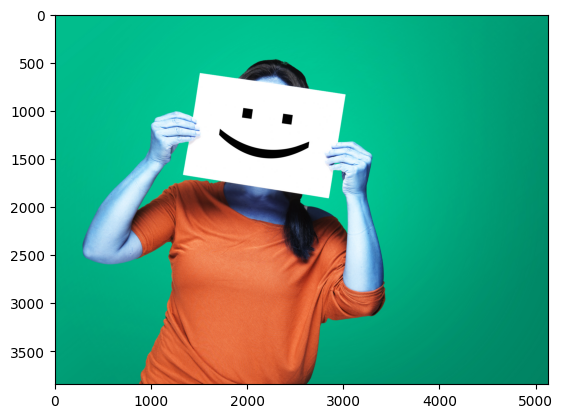

In [16]:
plt.imshow(happy_image_1) #wierd color because opencv use bgr

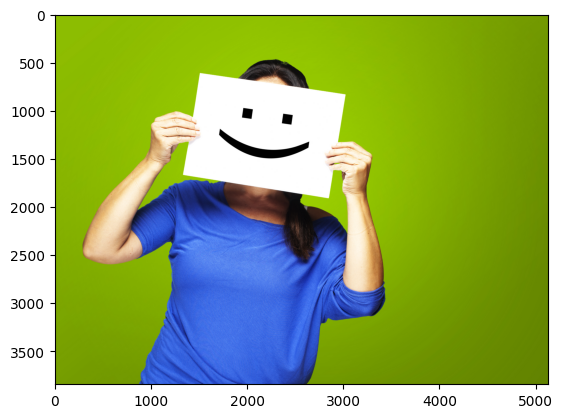

In [17]:
plt.imshow(cv2.cvtColor(happy_image_1,cv2.COLOR_BGR2RGB))

plt.show()

In [18]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [19]:
import numpy as np 

In [20]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [21]:
data=tf.keras.utils.image_dataset_from_directory('data') #this will direcilty create a dataset also apply bunch of data preprocessing to it

Found 168 files belonging to 2 classes.


The issue with this method of dataset cration is that we cannot directly assess the dataset by using data[0] so we need to first create a data iterator


In [22]:
data_iterator=data.as_numpy_iterator()

In [23]:
batch=data_iterator.next()

In [24]:
batch[0]#allowing us to access a batch 

array([[[[178.       , 153.       ,  87.       ],
         [177.6875   , 151.35156  ,  84.77344  ],
         [174.       , 149.       ,  82.       ],
         ...,
         [140.       , 115.       ,  75.       ],
         [140.       , 114.       ,  77.       ],
         [135.88281  , 113.88281  ,  72.88281  ]],

        [[184.71094  , 158.71094  ,  83.71094  ],
         [183.5625   , 157.5625   ,  82.6875   ],
         [182.05469  , 156.05469  ,  82.05469  ],
         ...,
         [146.       , 117.       ,  75.       ],
         [142.875    , 116.94531  ,  75.234375 ],
         [139.08594  , 117.71094  ,  74.89844  ]],

        [[192.       , 163.       ,  83.       ],
         [189.875    , 163.       ,  79.4375   ],
         [188.125    , 162.125    ,  78.125    ],
         ...,
         [147.       , 119.       ,  71.       ],
         [144.125    , 118.4375   ,  71.765625 ],
         [142.89844  , 118.02344  ,  76.64844  ]],

        ...,

        [[146.1875   , 137.0625   ,  1

In [25]:
batch[0].shape #the pipeline code that is keras.utlis.image_dataset_from_direcotry create as bunch of batch size of 32 and images are resize to the size of 256 by 256 with 3 rgb channel

(32, 256, 256, 3)

to override the default batch size we can pass use the following code
tf.keras.utils.images_dataset_from_directory('data',batch_size=16)
as well as other images processing


len 2 represent the first one being numpy representaion of our images
2 represent label


In [26]:
len(batch)

2

In [27]:
batch[1] #these represents the labels

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1])

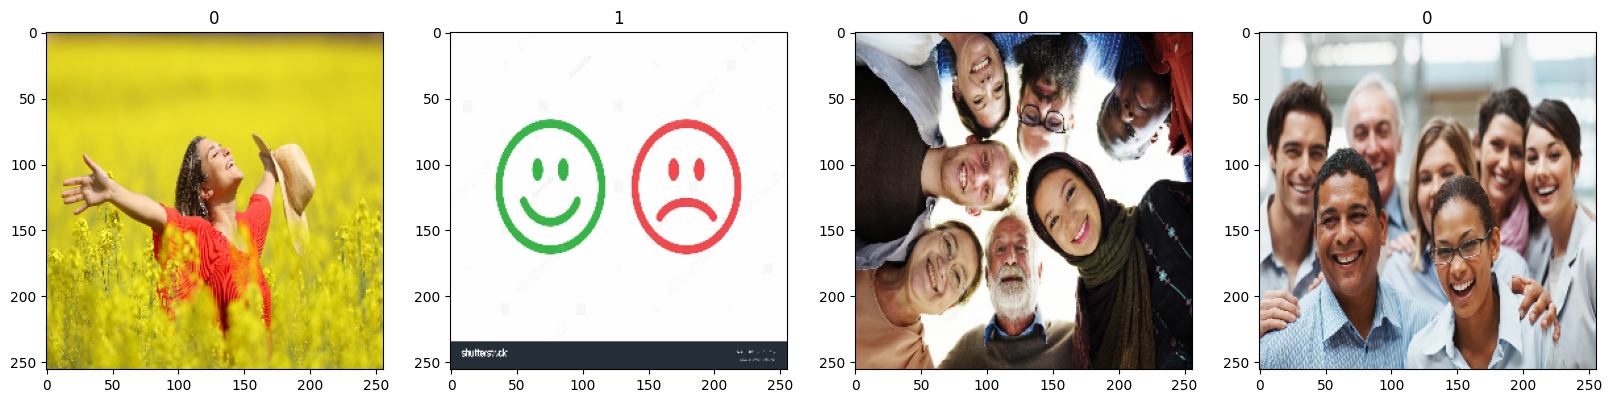

In [28]:
fig, ax =plt.subplots(ncols=4, figsize=(20,20))
for i,img in enumerate(batch[0][:4]):
    ax[i].imshow(img.astype(int))
    ax[i].title.set_text(batch[1][i])

Data preprocesing
Scalling the images values to 0 and 1
splitting to train test and validation


In [29]:
batch[0].shape

(32, 256, 256, 3)

In [30]:
batch[0].max()

255.0

In [31]:
#scaled=batch[0]/255 this can be done but is not efficent we want to do is use the data pipleling to normalize the data_batch everytime it is loaded into the dataset

Scale data


In [32]:
data=data.map(lambda x,y:(x/255,y))

In [33]:
scaled_iterator=data.as_numpy_iterator()


In [34]:
batch=scaled_iterator.next()

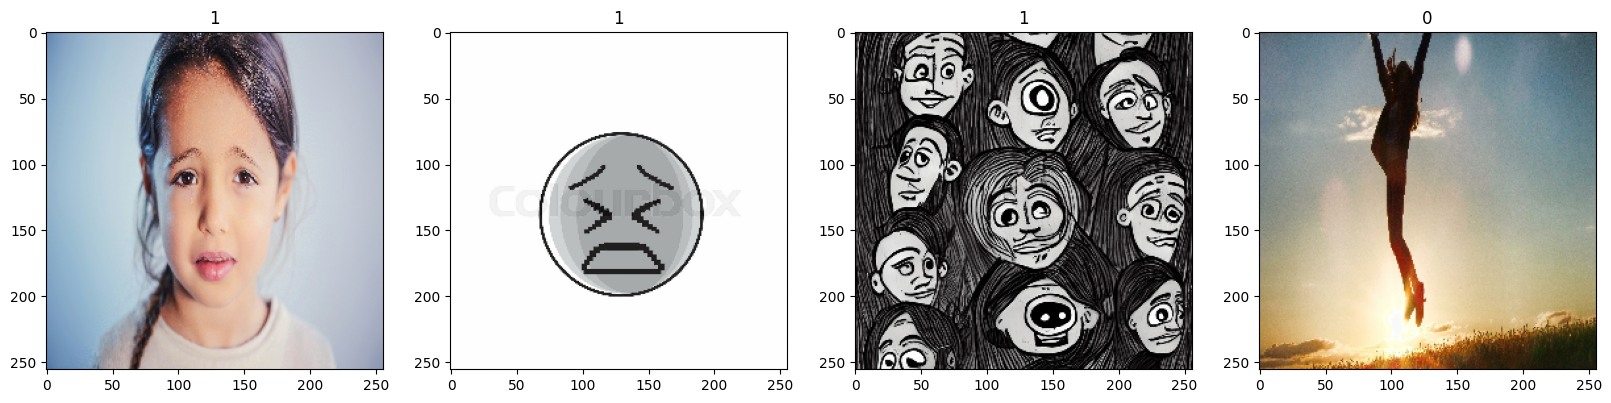

In [35]:
fig, ax =plt.subplots(ncols=4, figsize=(20,20))
for i,img in enumerate(batch[0][:4]):
    ax[i].imshow(img) #using int provides us black images only 
    ax[i].title.set_text(batch[1][i])

In [36]:
len(data) #checking the number of batch 

6

In [37]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1#adding +1 to test_size so that it can have 1 batch

In [38]:
val_size

1

In [39]:
test_size

1

In [40]:
train_size

4

In [41]:
train=data.take(train_size)#allocating the number of batch to training
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [42]:
len(train)

4

Building learning model


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [44]:
model=Sequential()

In [45]:
#filters,kernals,stride
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [46]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Training the model


In [48]:
logdir='logs'

In [49]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [50]:
history=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20


4/4 [==============================] - 30s 5s/step - loss: 1.0590 - accuracy: 0.5859 - val_loss: 0.7039 - val_accuracy: 0.4375
Epoch 2/20
4/4 [==============================] - 12s 2s/step - loss: 0.6698 - accuracy: 0.5156 - val_loss: 0.6516 - val_accuracy: 0.7500
Epoch 3/20
4/4 [==============================] - 14s 3s/step - loss: 0.6142 - accuracy: 0.7188 - val_loss: 0.5802 - val_accuracy: 0.7188
Epoch 4/20
4/4 [==============================] - 9s 2s/step - loss: 0.5602 - accuracy: 0.7578 - val_loss: 0.5221 - val_accuracy: 0.7188
Epoch 5/20
4/4 [==============================] - 13s 3s/step - loss: 0.4735 - accuracy: 0.8281 - val_loss: 0.3464 - val_accuracy: 0.9375
Epoch 6/20
4/4 [==============================] - 11s 2s/step - loss: 0.3571 - accuracy: 0.8828 - val_loss: 0.4228 - val_accuracy: 0.8750
Epoch 7/20
4/4 [==============================] - 12s 2s/step - loss: 0.2633 - accuracy: 0.9062 - val_loss: 0.3498 - val_accuracy: 0.8438
Epoch 8/20
4/4 [=================

Plotting performance of our model


In [51]:
history.history

{'loss': [1.0589525699615479,
  0.6697909235954285,
  0.6142032146453857,
  0.5601922273635864,
  0.473544716835022,
  0.3571119010448456,
  0.2633158266544342,
  0.26650184392929077,
  0.23144173622131348,
  0.17431913316249847,
  0.10013730078935623,
  0.10003462433815002,
  0.07620592415332794,
  0.05725538730621338,
  0.06401088833808899,
  0.03731588274240494,
  0.029218561947345734,
  0.014900628477334976,
  0.011616921983659267,
  0.008762543089687824],
 'accuracy': [0.5859375,
  0.515625,
  0.71875,
  0.7578125,
  0.828125,
  0.8828125,
  0.90625,
  0.875,
  0.8984375,
  0.9453125,
  0.9765625,
  0.96875,
  0.9765625,
  0.9765625,
  0.9765625,
  0.9921875,
  0.9921875,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.7038683891296387,
  0.6515769958496094,
  0.5802130699157715,
  0.522060751914978,
  0.3464023470878601,
  0.4228433072566986,
  0.349845826625824,
  0.11363162100315094,
  0.30156296491622925,
  0.06811452656984329,
  0.1305474191904068,
  0.15246473252773285,
  0.0421001240

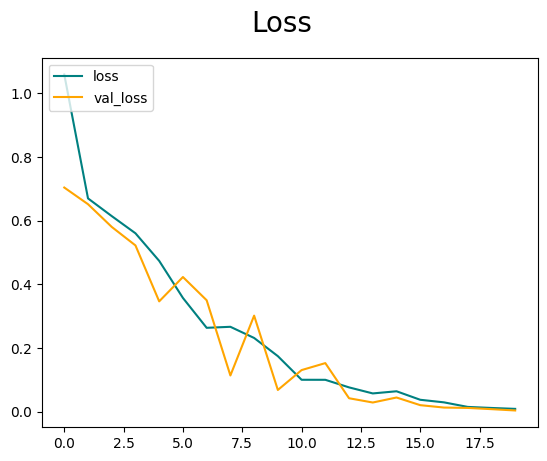

In [52]:
fig=plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

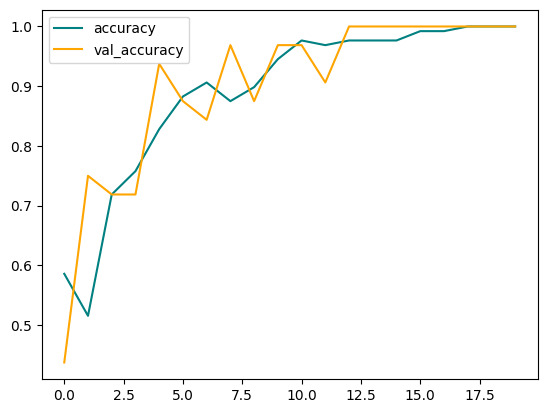

In [53]:
plt.plot(history.history['accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=30)
plt.legend(loc="upper left")
plt.show()

Evaluate our model


In [54]:
#Evalute
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
#these are the metrics generally used for classification problem

In [55]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

Testing with unseen test data


In [56]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 1s 933ms/step


In [57]:
print(f"the Precision is {pre.result().numpy()},Recall is {re.result()}, BinaryAccuracy is {acc.result()} ")

the Precision is 1.0,Recall is 1.0, BinaryAccuracy is 1.0 


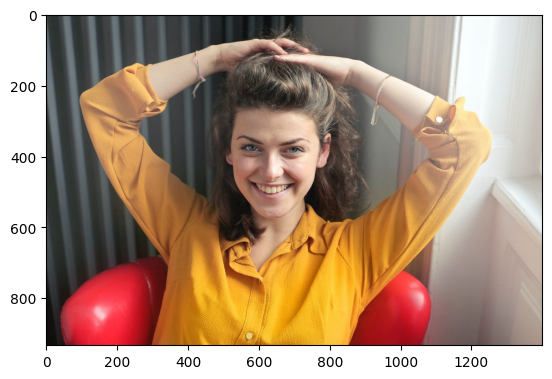

In [58]:
img=cv2.imread('happy_test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

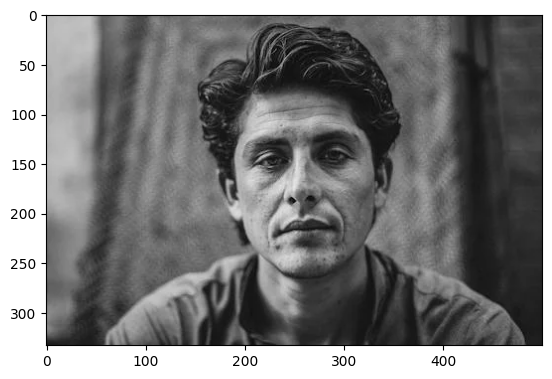

In [59]:
img2=cv2.imread('sad_test.jpg')
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.show()

Our model takes images in the form of 256\*256 so we need to resize it


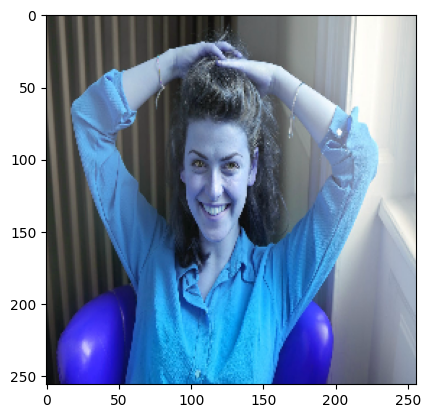

In [60]:
resize_happy=tf.image.resize(img,(256,256))
plt.imshow(resize_happy.numpy().astype(int))
plt.show()

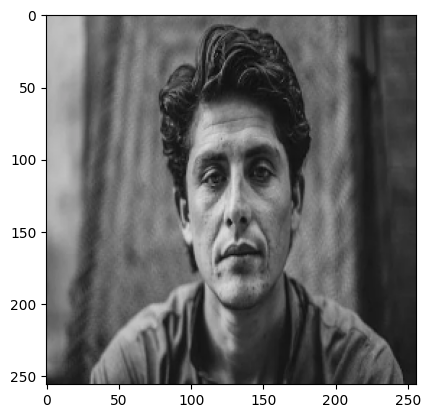

In [61]:
resize_sad=tf.image.resize(img2,(256,256))
plt.imshow(resize_sad.numpy().astype(int))
plt.show()

Our model expects the images to be passed in batches not a single images so we need to put in the list.
so we are storing it in extra dimension


In [62]:
np.expand_dims(resize_happy,0).shape

(1, 256, 256, 3)

In [63]:
np.expand_dims(resize_sad,0).shape

(1, 256, 256, 3)

Note:
happy=0
sad=1


In [64]:
yhat=model.predict(np.expand_dims(resize_happy/255,0))

1/1 [==============================] - 0s 125ms/step


In [65]:
yhat

array([[0.08272354]], dtype=float32)

In [66]:
yhat2=model.predict(np.expand_dims(resize_sad/255,0))

1/1 [==============================] - 0s 73ms/step


In [67]:
yhat2

array([[0.869885]], dtype=float32)

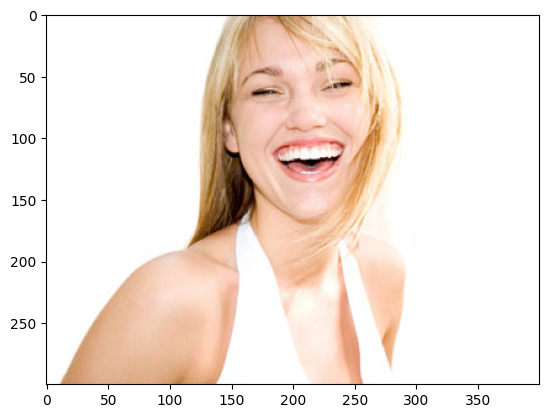

In [68]:
img3=cv2.imread('sad_test2.jpg')
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))
plt.show()

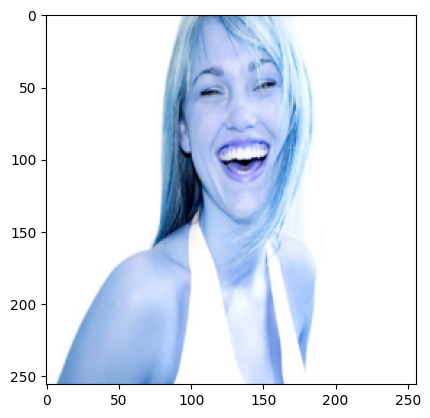

In [69]:
resize_sad2=tf.image.resize(img3,(256,256))
plt.imshow(resize_sad2.numpy().astype(int))
plt.show()

In [70]:
np.expand_dims(resize_sad2,0).shape

(1, 256, 256, 3)

In [71]:
yhat3=model.predict(np.expand_dims(resize_sad2/255,0))

1/1 [==============================] - 0s 96ms/step


In [72]:
yhat3

array([[0.9628967]], dtype=float32)

In [73]:
if yhat3>0.5:
    print(f"The person is sad")
else:
    print(f"The person is sad")

The person is sad


Saving the model


In [74]:
from tensorflow.keras.models import load_model

In [75]:
model.save(os.path.join('models','happysadmodel.h5'))

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [76]:
new_model=load_model(os.path.join('models','happysadmodel.h5'))

In [79]:
yhat=new_model.predict(np.expand_dims(resize_happy/255,0))

1/1 [==============================] - 0s 87ms/step


In [80]:
if yhat>0.5:
    print("The person is sad")
else:
    print("The person is happy")

The person is happy
